# Deric EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
plt.style.use("seaborn-colorblind")

# specify the date format to be parsed
date_format = '%Y-%m-%d'
# read csv files
billboard_cleaned = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv', parse_dates=['week_id'], date_format=date_format)
audio_features_merged = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv', parse_dates=['week_id'], date_format=date_format)

/tmp/ipykernel_1846/2625251604.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [2]:
# Examine long billboard data
print(billboard_cleaned.shape)
print(billboard_cleaned.columns)
billboard_cleaned.head(2)

(327895, 9)
Index(['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance',
       'previous_week_position', 'peak_position', 'weeks_on_chart'],
      dtype='object')


,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart
0,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5


In [3]:
# Examine collapsed billboard data with audio features
print(audio_features_merged.shape)
print(audio_features_merged.columns)
audio_features_merged.head(2)

(29383, 23)
Index(['song_id', 'performer', 'song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'peak_position', 'week_id', 'weeks_on_chart'],
      dtype='object')


,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's music""]",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14


## Artists with most hits

In [4]:
# Filter to Rank 1 songs
rank1_df = audio_features_merged[audio_features_merged.peak_position == 1]
print(rank1_df.shape)
rank1_artists = rank1_df[['performer', 'peak_position']].groupby('performer').sum('peak_position').sort_values('peak_position', ascending = False).reset_index()
rank1_artists_top = rank1_artists[rank1_artists.peak_position > 5]
rank1_artists_top

(1098, 23)


,performer,peak_position
0,The Beatles,19
1,Mariah Carey,16
2,Madonna,12
3,The Supremes,10
4,Michael Jackson,10
5,Bee Gees,9
6,The Rolling Stones,8
7,Stevie Wonder,7
8,Janet Jackson,7
9,Whitney Houston,7


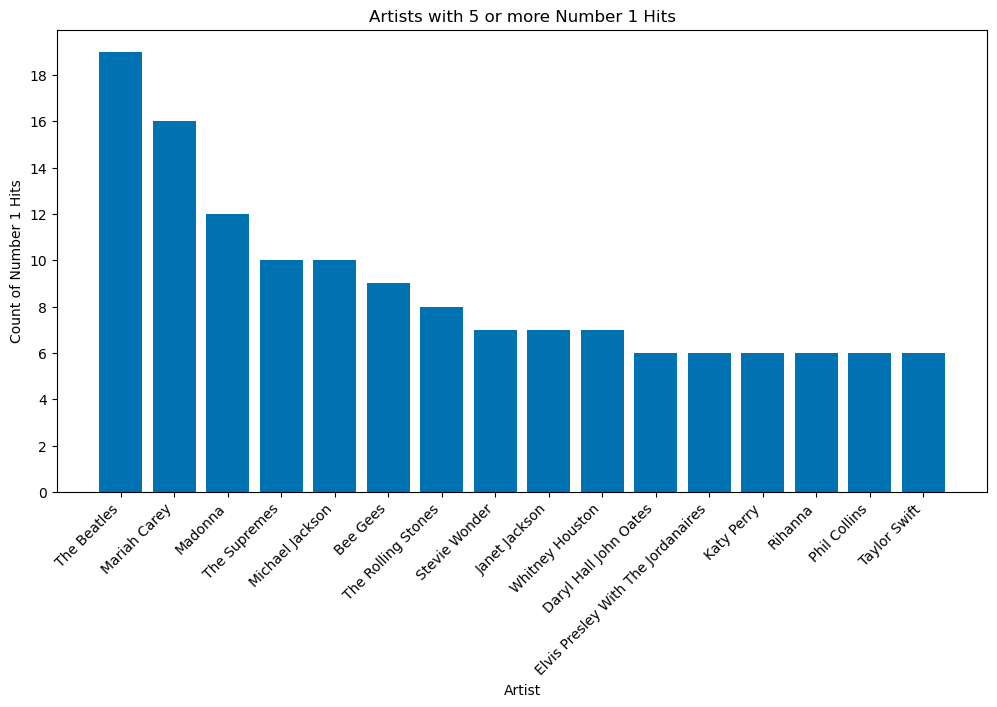

In [5]:
# Plot artists with 5 or more number 1 hits
plt.figure(figsize=(12, 6))
plt.bar(rank1_artists_top.performer, rank1_artists_top.peak_position)
plt.title('Artists with 5 or more Number 1 Hits')
plt.xlabel('Artist')
plt.ylabel('Count of Number 1 Hits')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(rank1_artists_top.peak_position)+1, 2))
plt.savefig('plots/artists_no1_bar.png')
plt.show()

## Key Mode analysis

In [6]:
# Standardize key
audio_features_merged['key'].value_counts()
key_mapping = {0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F', 6: 'F#/Gb', 7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'}  
audio_features_merged['key_label'] = audio_features_merged['key'].map(key_mapping)

# Standardize mode
mode_mapping = {0: 'Minor', 1: 'Major'}
audio_features_merged['mode_label'] = audio_features_merged['mode'].map(mode_mapping)

# Create combined key variable
audio_features_merged['key_final'] = audio_features_merged['key_label'] + ' ' + audio_features_merged['mode_label']

In [7]:
audio_features_merged[['key', 'mode', 'key_final']].head()

,key,mode,key_final
0,9.0,0.0,A Minor
1,11.0,1.0,B Major
2,4.0,1.0,E Major
3,9.0,1.0,A Major
4,0.0,1.0,C Major


In [8]:
key_agg = audio_features_merged[['song_id', 'key_final']].groupby('key_final').count().reset_index().sort_values('song_id', ascending = False)
key_agg

,key_final,song_id
6,C Major,2569
20,G Major,2355
10,D Major,2152
0,A Major,1742
8,C#/Db Major,1567
16,F Major,1444
22,G#/Ab Major,1211
14,E Major,1176
2,A#/Bb Major,1102
5,B Minor,862


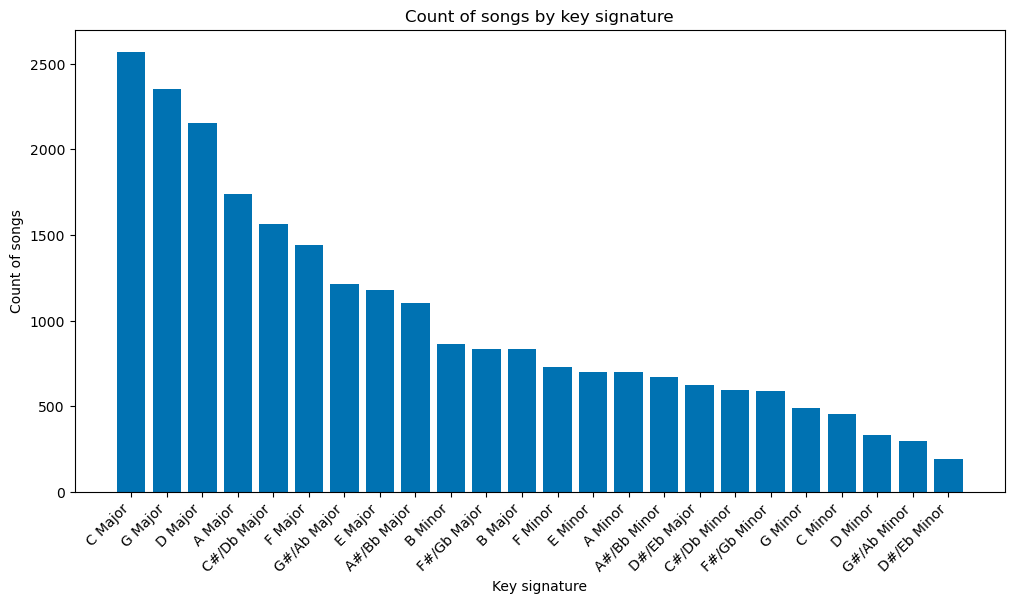

In [9]:
# Plot artists with 5 or more number 1 hits
plt.figure(figsize=(12, 6))
plt.bar(key_agg.key_final, key_agg.song_id)
plt.title('Count of songs by key signature')
plt.xlabel('Key signature')
plt.ylabel('Count of songs')
plt.xticks(rotation=45, ha='right')
plt.savefig('plots/key_bar.png')
plt.show()

## Average and median position from weeks on chart

In [10]:
# Average position by weeks on chart
billboard_position = billboard_cleaned[['weeks_on_chart', 'week_position']].groupby('weeks_on_chart').agg(['mean', 'median']).reset_index()
billboard_position.columns = ['weeks_on_chart', 'mean_pos', 'median_pos']
billboard_position.head()

,weeks_on_chart,mean_pos,median_pos
0,1,80.456654,86.0
1,2,71.719771,76.0
2,3,63.201882,66.0
3,4,56.111228,57.0
4,5,50.426670,51.0


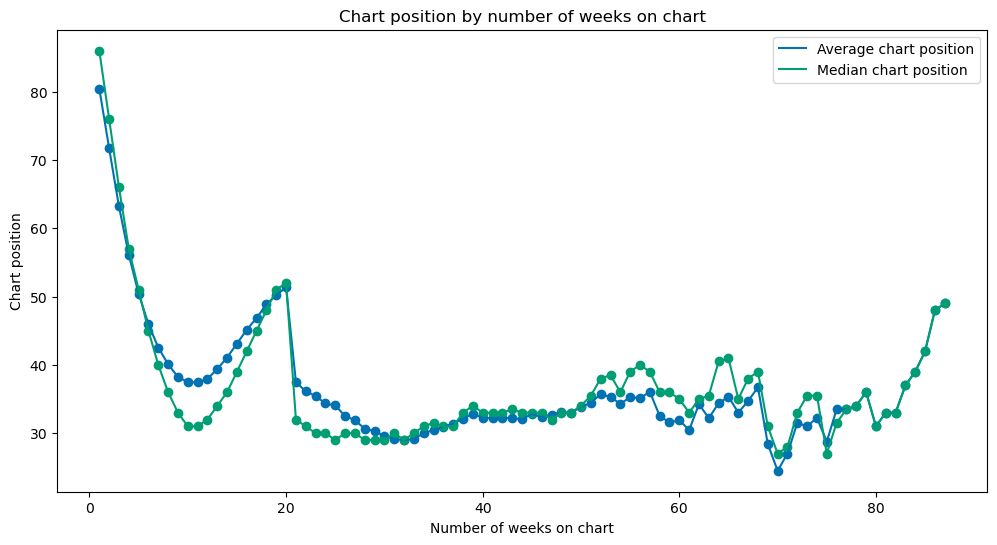

In [11]:
# Plot series of position by number of weeks on chart
plt.figure(figsize=(12, 6))
plt.scatter(billboard_position.weeks_on_chart, billboard_position.mean_pos)
plt.scatter(billboard_position.weeks_on_chart, billboard_position.median_pos)
plt.plot(billboard_position.weeks_on_chart, billboard_position.mean_pos, label = "Average chart position")
plt.plot(billboard_position.weeks_on_chart, billboard_position.median_pos, label = "Median chart position")
plt.title('Chart position by number of weeks on chart')
plt.xlabel('Number of weeks on chart')
plt.ylabel('Chart position')
plt.legend()
plt.savefig('plots/pos_by_weeks.png')
plt.show()

## Distribution of song length

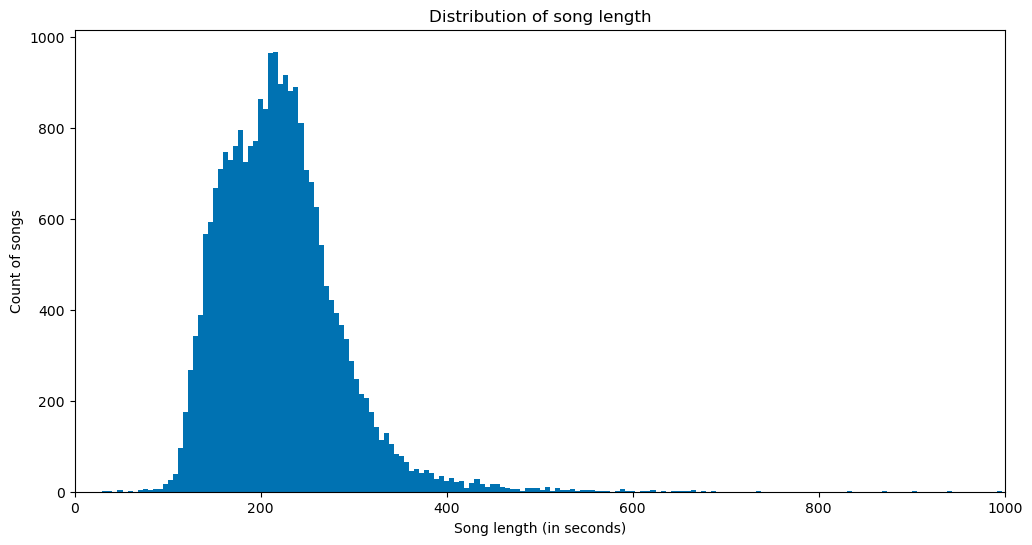

In [12]:
audio_features_merged['length_seconds'] = audio_features_merged.spotify_track_duration_ms / 1000
plt.figure(figsize=(12, 6))
plt.hist(audio_features_merged.length_seconds, bins = 'auto')
plt.title('Distribution of song length')
plt.xlabel('Song length (in seconds)')
plt.ylabel('Count of songs')
plt.xlim(0, 1000)
plt.savefig('plots/song_length_hist.png')
plt.show()